In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
df = pd.read_csv("../data/heart_data.csv")

df_dropped_rows = df.dropna()

df_dropped_columns = df.dropna(axis=1)

df.isnull().sum()

Age                      0
Gender                   0
BloodPressure            0
Cholesterol              0
HeartRate                0
QuantumPatternFeature    0
HeartDisease             0
dtype: int64

In [15]:
df.head()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,68,1,105,191,107,8.362241,1
1,58,0,97,249,89,9.249002,0
2,44,0,93,190,82,7.942542,1
3,72,1,93,183,101,6.495155,1
4,37,0,145,166,103,7.653900,1


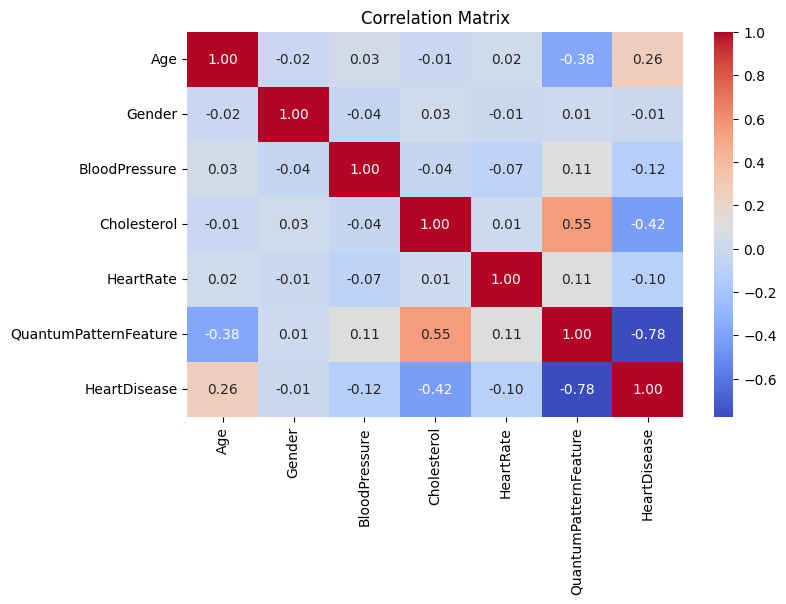

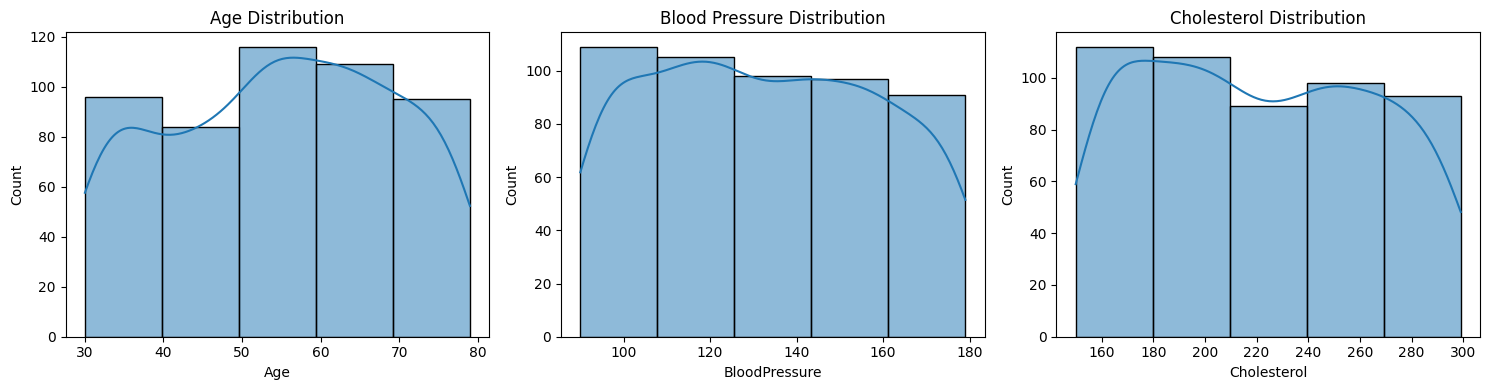

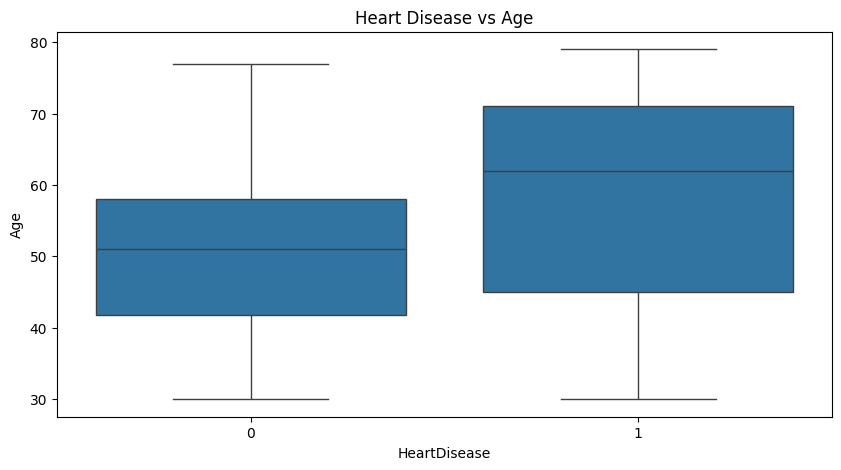

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(df["Age"], bins=5, kde=True, ax=axes[0])
axes[0].set_title("Age Distribution")

sns.histplot(df["BloodPressure"], bins=5, kde=True, ax=axes[1])
axes[1].set_title("Blood Pressure Distribution")

sns.histplot(df["Cholesterol"], bins=5, kde=True, ax=axes[2])
axes[2].set_title("Cholesterol Distribution")

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
sns.boxplot(x=df["HeartDisease"], y=df["Age"])
plt.title("Heart Disease vs Age")
plt.show()

    

In [35]:
X = df.drop("HeartDisease", axis=1)


y = df.drop(['Age', "Gender", 'BloodPressure', 'Cholesterol', 'HeartRate', 'QuantumPatternFeature'], axis=1)

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [64]:


from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier(random_state=42)


tree.fit(X_train, y_train)


tree_pred = tree.predict(X_test)


c:\Users\tokri\Downloads\ml_server\venv\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


matrix = confusion_matrix(y_test, tree_pred)

print(matrix)

[[55  4]
 [10 81]]


Accuracy: (55+81)/(55+4+10+81) = 136/150 = 90.7%
Precision: 81/(81+4) = 81/85 = 95.3% (when model predicts positive, it's right 95.3% of the time)
Recall/Sensitivity: 81/(81+10) = 81/91 = 89.0% (model correctly identifies 89% of all actual positives)
Specificity: 55/(55+4) = 55/59 = 93.2% (model correctly identifies 93.2% of all actual negatives)
F1 Score: 2(Precision×Recall)/(Precision+Recall) = 92.0% (harmonic mean of precision and


### Age seems to be the biggest important feature in predicting Heart Disease

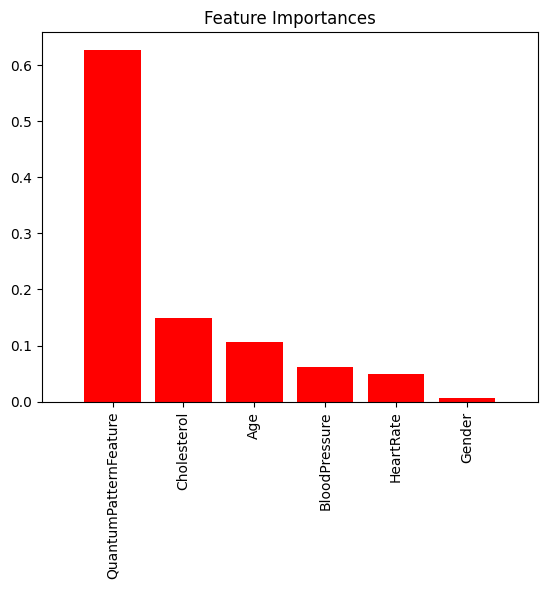

In [71]:
# Feature Importance
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

feature_names = list(df.columns)


plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [75]:
accuracy = accuracy_score(y_test, tree_pred)

print(f'Accuracy: {accuracy}')


cr = classification_report(y_test, tree_pred)

print(cr)


Accuracy: 0.9066666666666666
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        59
           1       0.95      0.89      0.92        91

    accuracy                           0.91       150
   macro avg       0.90      0.91      0.90       150
weighted avg       0.91      0.91      0.91       150



In [80]:
param_grid = {
    "n_estimators": range(50, 300, 50),         # Number of trees in the forest
    "max_depth": range(3, 11),                    # Maximum depth of each tree
    "min_samples_split": [2, 5, 10],              # Minimum number of samples required to split an internal node
    "min_samples_leaf": [1, 2, 4],                # Minimum number of samples required at a leaf node
    "max_features": ["sqrt", "log2", None],       # Number of features to consider when looking for the best split
    "bootstrap": [True, False]                    # Whether bootstrap samples are used when building trees
}


tree_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

tree_grid.fit(X_train, y_train)


best_params = tree_grid.best_params_

print(f'Best Hyperparamers: {best_params}')

tree_pred = tree_grid.best_estimator_.predict(X_test)

accuracy = accuracy_score(y_test, tree_pred)
print(f'Accuracy: {accuracy:.2f}')

cm = confusion_matrix(y_test, tree_pred)
print('Confusion Matrix:')
print(cm)

cr = classification_report(y_test, tree_pred)
print('Classification Report:')
print(cr)


Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


c:\Users\tokri\Downloads\ml_server\venv\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Hyperparamers: {'bootstrap': True, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Accuracy: 0.91
Confusion Matrix:
[[55  4]
 [10 81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        59
           1       0.95      0.89      0.92        91

    accuracy                           0.91       150
   macro avg       0.90      0.91      0.90       150
weighted avg       0.91      0.91      0.91       150



In [ ]:
best_model = RandomForestClassifier(bootstrap=True, max_depth=6, max_features="sqrt", min_samples_leaf=1, min_samples_split=5, n_estimators=150)

best_model.fit(X_train, y_train)

best_model_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, best_model_pred)


c:\Users\tokri\Downloads\ml_server\venv\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9066666666666666
